In [41]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:
def activation(x):
    return 1 / (1 + np.exp(-x))

def derivative(x):
    return x * (1 - x)

In [45]:
def forward(X, w1, w2, w3):
    hidden_layer1 = activation(np.dot(X, w1))
    hidden_layer2 = activation(np.dot(hidden_layer1, w2))
    out_layer = activation(np.dot(hidden_layer2, w3))
    return hidden_layer1, hidden_layer2, out_layer

def backforward(X, y_true, w1, w2, w3, epoch, lr):
    errors = []
    for _ in range(epoch):
        hidden1, hidden2, output = forward(X, w1, w2, w3)

        err = y_true - output
        errors.append(np.mean(np.abs(err)))

        delta_out = err * derivative(output)
        delta_hidden2 = np.dot(delta_out, w3.T) * derivative(hidden2)
        delta_hidden1 = np.dot(delta_hidden2, w2.T) * derivative(hidden1)

        w3 += lr * np.dot(hidden2.T, delta_out)
        w2 += lr * np.dot(hidden1.T, delta_hidden2)
        w1 += lr * np.dot(X.T, delta_hidden1)

    print("\nЗначення помилки:", np.mean(np.abs(errors)), "\n")
    plt.plot(errors, color='r')
    plt.xlabel("Епохи")
    plt.ylabel("Помилка")
    plt.title("Графік помилки")
    plt.show()
    return w1, w2, w3


Початкові ваги:
 W1:
 [[-0.18652373 -0.24375587 -0.38076823]
 [ 0.00169331 -0.02767107  0.16810774]
 [ 0.19021544  0.04910008  0.07967245]] 
W2:
 [[-0.42722141  0.19987463]
 [ 0.32502451 -0.18264359]
 [ 0.38029359 -0.24008348]] 
W3:
 [[0.47782208]
 [0.15329097]]

Значення помилки: 0.12942048568533607 



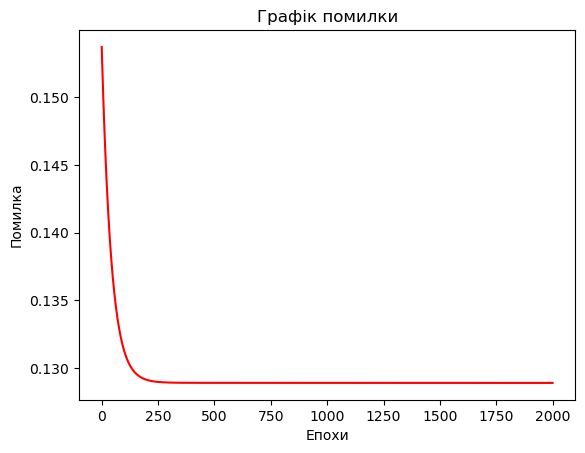

Результуючі ваги:
 W1:
 [[-2.08762132e-01 -2.27656437e-01 -3.61113814e-01]
 [-1.95963185e-04 -2.62857511e-02  1.69954542e-01]
 [ 1.60562058e-01  7.05839009e-02  1.06006176e-01]] 
W2:
 [[-0.44937669  0.19702006]
 [ 0.29572616 -0.17991193]
 [ 0.34795015 -0.23588253]] 
W3:
 [[ 0.13706186]
 [-0.0956959 ]]


In [47]:
n = 3  # Кількість входів
h1 = 3  # Кількість нейронів у першому прихованому шарі
h2 = 2  # Кількість нейронів у другому прихованому шарі
m = 1   # Кількість виходів

weight_1 = np.random.rand(n, h1) - 0.5
weight_2 = np.random.rand(h1, h2) - 0.5
weight_3 = np.random.rand(h2, m) - 0.5

print("\nПочаткові ваги:\n W1:\n", weight_1, "\nW2:\n", weight_2, "\nW3:\n", weight_3)

x_train = np.array([
    [0.15, 0.54, 0.45],
    [0.32, 0.55, 0.7],
    [0.15, 0.03, 0.75]
])

y_train = np.array([
    [0.32],
    [0.7],
    [0.5]
])

lr = 0.25
epoch = 2000

tr_w1, tr_w2, tr_w3 = backforward(x_train, y_train, weight_1, weight_2, weight_3, epoch, lr)

print("Результуючі ваги:\n W1:\n", tr_w1, "\nW2:\n", tr_w2, "\nW3:\n", tr_w3)

In [49]:
print("Різниця між цільовими та отриманими виходами")
print("Цільові виходи:\n", y_train)
print("\nОтримані виходи:\n", forward(x_train, tr_w1, tr_w2, tr_w3)[2])

Різниця між цільовими та отриманими виходами
Цільові виходи:
 [[0.32]
 [0.7 ]
 [0.5 ]]

Отримані виходи:
 [[0.50668276]
 [0.50662146]
 [0.5065934 ]]
